<a href="https://colab.research.google.com/github/Kevincancino26/mis-notebook-de-estudio-/blob/main/Regresi%C3%B3n_Lineal_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regresión Lineal II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca pandas

https://pandas.pydata.org/

In [ ]:
import pandas as pd

## El Dataset y el Proyecto
<hr>

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>El mercado inmobiliario ha sido objeto de varios estudios e investigaciones en los últimos tiempos. La crisis financiera que afecta a la economía ha afectado significativamente las inversiones y ganancias de este sector. Este escenario fomenta un mayor interés en los estudios de previsión de la demanda basados ​​en las características de este mercado, los inmuebles y el entorno de estos inmuebles.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>En este contexto, el principal objetivo de nuestro proyecto es desarrollar un sistema de valuación inmobiliaria utilizando la metodología de regresión lineal, que es una de las técnicas de Machine Learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nuestro *dataset* es una muestra aleatoria de 5000 inmuebles disponibles para la venta en el municipio de Rio de Janeiro.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (US$) de oferta del inmueble</li>
    <li><b>Área</b> - Área del inmueble en m²</li>
    <li><b>Dist_Playa</b> - Distancia del inmueble a la playa (km) (en línea recta)</li>
    <li><b>Dist_Farmacia</b> - Distancia del inmueble a la farmacia más cercana (km) (en línea recta)</li>
</ul>

## Lectura de los datos

In [ ]:
url = '/content/dataset.csv'
datos = pd.read_csv(url,sep=';')


## Ver los datos

In [ ]:
datos.head()

,Valor,Area,Dist_Playa,Dist_Farmacia
0,850277,280,0.240925,0.793637
1,166359,208,0.904136,0.134494
2,471349,170,0.059525,0.423318
3,101664,100,2.883181,0.525064
4,406654,164,0.239758,0.192374


## Verificando el tamaño del dataset

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Valor          5000 non-null   int64  
 1   Area           5000 non-null   int64  
 2   Dist_Playa     5000 non-null   float64
 3   Dist_Farmacia  5000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 156.4 KB


# <font color='red' style='font-size: 30px;'>1.3 Analisis preliminar</font>
<hr style='border: 2px solid red;'>

## Estadísticos descriptivos


In [ ]:
datos.describe().round(2)

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,259320.95,121.94,3.02,0.50
std,348108.85,90.54,3.17,0.29
min,13863.00,16.00,0.00,0.00
25%,85028.00,70.00,0.44,0.24
50%,151571.00,93.00,1.48,0.50
75%,293900.00,146.00,5.61,0.75
max,4621072.00,2000.00,17.96,1.00


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

In [ ]:
datos.corr().round(4)

,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Playa,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


Lo que aprendimos en esta aula:

Como importar la biblioteca pandas.
Como leer y ver los datos.
Como comprobar el tamaño del dataset.
Como crear una tabla con estadísticos descriptivos de los datos del dataset.
Como crear una matriz de correlación a partir de los datos de la tabla de estadísticos descriptivos.

# <font color='red' style='font-size: 30px;'>2.1 Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

In [ ]:
import seaborn as sns

## Configuración del formato de los gráficos

In [ ]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

## Box plot de la variable *dependiente* (y)

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Precio de los Inmuebles'}, xlabel='Dolares'>

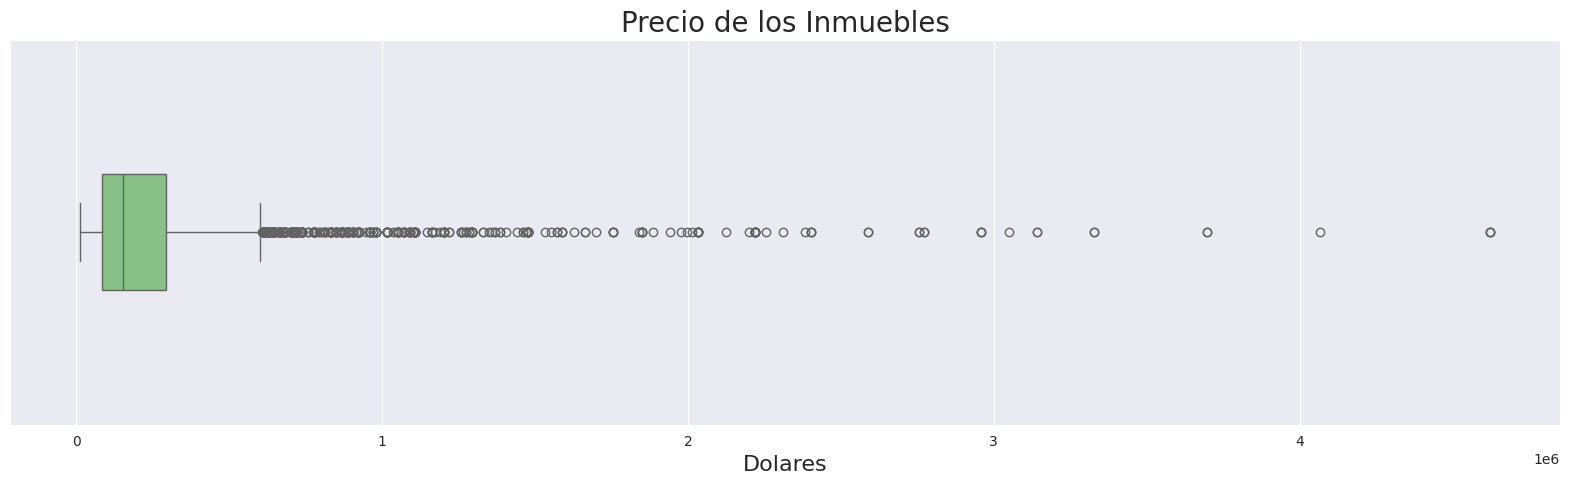

In [ ]:
ax=sns.boxplot(x=datos['Valor'],orient='h',width=0.3)
ax.figure.set_size_inches(20, 5)#tamaño del grafocp
ax.set_title('Precio de los Inmuebles', fontsize=20)#titulo del grafico
ax.set_xlabel('Dolares', fontsize=16)
ax#etitqueta del grafico

al mirar el boxplot vemos que nuestra variable tiene muchso datos atipicos fuera del limite superior, debido a este comportamiento todos estos puntos los clasificamos como outliers, o quizar solo los ultimos 3 puntois sean esto, aunque la spilas de puntos pueden indicar una simetria a la derecha en la distribucion de la variable del precio

# <font color='red' style='font-size: 30px;'>2.2 Distribución de frecuencias</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

In [ ]:
import matplotlib.pyplot as plt

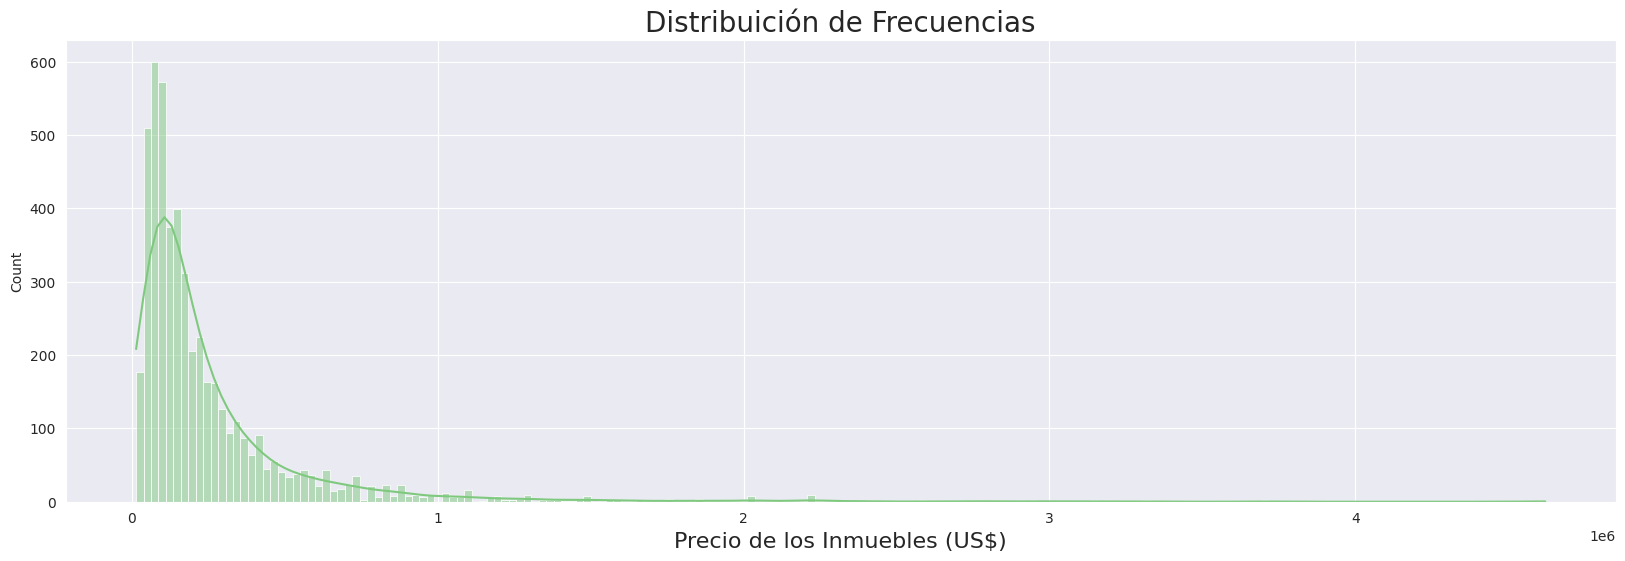

In [ ]:
fig,ax=plt.subplots(figsize=(20, 6))
sns.histplot(datos['Valor'],kde=True, ax=ax)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('Precio de los Inmuebles (US$)', fontsize=16)
plt.show()

temeos que nuestros datos tiene una asimetria a la derecha, donde tenemos del lado izquierdo precios bajos de los inmuebles y pocos inmuebeles de precios altos, con inmuebles de lujo, esto es normal observar cuando vemos una diferencia en el precio de los muebles.

esto nos puede generar problemas dado que uno de los supuestos es que nuestros datos sean mas cercanos a la normal y tengan una distribucion simetrica.

obviamente la simetria perfecta no siempre estara en los datos reales,d ado que siempre habra una simetria, y la idea es que la distribucion de nuestra variable se hacerque mas a la simetria

el domelo de asimetria puede generar problemas al momento de realizar la regresion pero podemos transformar los datos para que estos se hacerquen mas a una distribucion normal, para que esten mas cercanos a la caracteristica simetrica

<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Box-Plot+II.png'>

# <font color='red' style='font-size: 30px;'>2.3 Dispersión entre las Variables</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

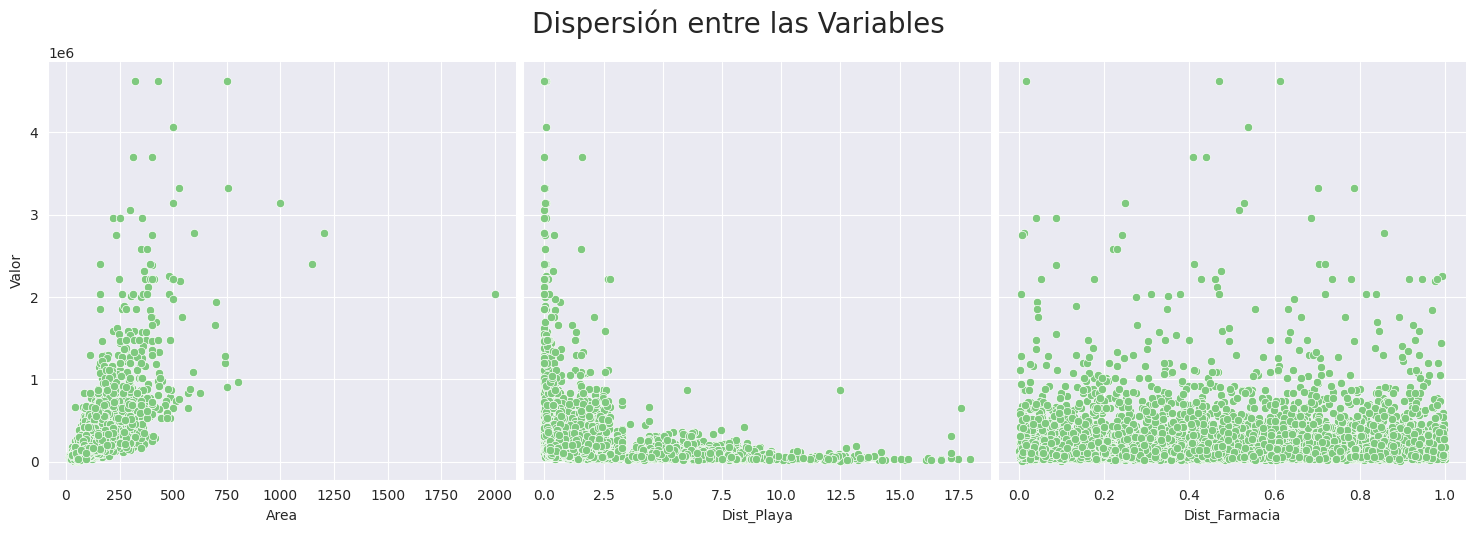

In [ ]:
ax=sns.pairplot(datos,y_vars='Valor',x_vars=['Area','Dist_Playa','Dist_Farmacia'],height=5)#y es nuestra variable independiente (vars=valor),x nuestras variables dependientes
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

podemos ver la dispersion de los puntos, en valor y area podemos ver que los valores estan dispersos y que hay una cierta curba, no estan en una direcicon recta, lo mismo en valro y playa, y en valor y farmacia, no podemos idetntificar ninguna tendencia los puntos no muestran nunguna regresion

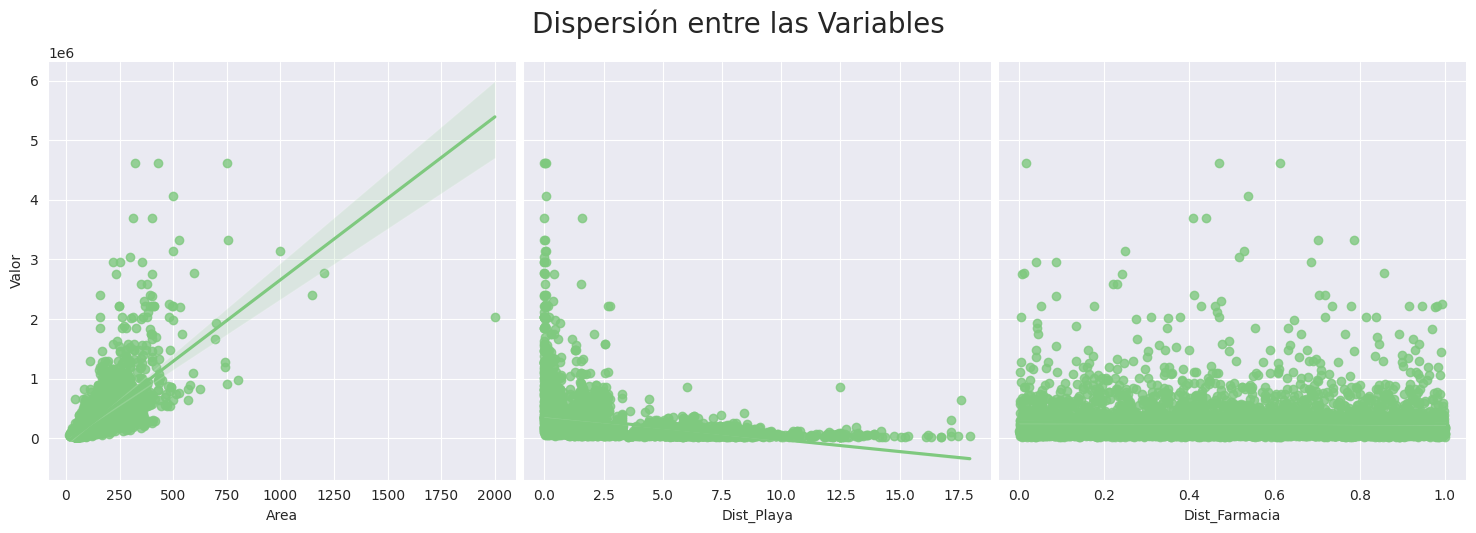

In [ ]:
ax=sns.pairplot(datos,y_vars='Valor',x_vars=['Area','Dist_Playa','Dist_Farmacia'],height=5,kind='reg')
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

es la misma grafica pero con el parametro kind='reg', incluimos la linea de regresion

donde podemos ver claramente, que lso puntos no siguen la linea de regresion, un ejemplo en el tercer grafico es imperceptible dado que no lo podemos ver por los puntos, asi mismo al observar los otros dos graficos, podemos observar que estan muy dispersos en los puntos en los grafico, dado que no siguen la direccion de la linea de regresion, asi que podemos conlcuir que la variable valor no esta relacionada deforma lineal con las variables explicativas por lo tanto no podemos estimar el modelo de regresion lienal

---



## Lo que aprendimos en esta aula:

* Como configurar el formato de los gráficos.
* Como construir el box-plot de la variable dependiente.
* Como graficar la distribución de frecuencias de la variable dependiente.
* Como graficar los diagramas de dispersión entre las variables del dataset.
* Análisis de dispersión entre las variables.

# <font color='red' style='font-size: 30px;'>3.1 Transformando los Datos</font>
<hr style='border: 2px solid red;'>

## Distribuición Normal
<hr>

### ¿Porque?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Tests paramétricos asumen que los datos muestrales se recopilaron de una población con una distribución de probabilidad conocida. Muchos de los tests estadísticos asumen que los datos siguen una distribución normal (t de Student, intervalos de confianza, etc.).</p>





<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando la biblioteca numpy

In [ ]:
import numpy as np

aplicaremos la transformacion logaritmica para asi transformar nuestros datos en datos que sigan una tendencia normal o esten cercanos a esta, dado que los modelos que siguen una distribucion normal nos indican que el modleo existe o no

## Aplicando la transformación logarítmica a los datos del *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [ ]:
np.log(1)

np.float64(0.0)

en lass funciones logaritmicas cuando hacemoslog de 1 este nos dara cero, pero cuando nosotros tratamos de hacer log de 0 este nos dara un indeterminado o infinito

In [ ]:
datos['log_Valor']=np.log(datos['Valor'])#creamos el valor logaritmo con la funcion log y la variable valor, dado que este es diferente a 0 el valor de esta varibale
datos['log_Area']=np.log(datos['Area'])
datos['log_Dist_Playa']=np.log(datos['Dist_Playa']+1)#como los valores de estas variable on iguales o cercanos a cero, al sacar log nos daria un numero infinito por lo tando sumamos 1 a cada valrod e la variable
datos['log_Dist_Farmacia']=np.log(datos['Dist_Farmacia']+1)

## Distribuición de frecuencias de la variable *dependiente transformada* (y)

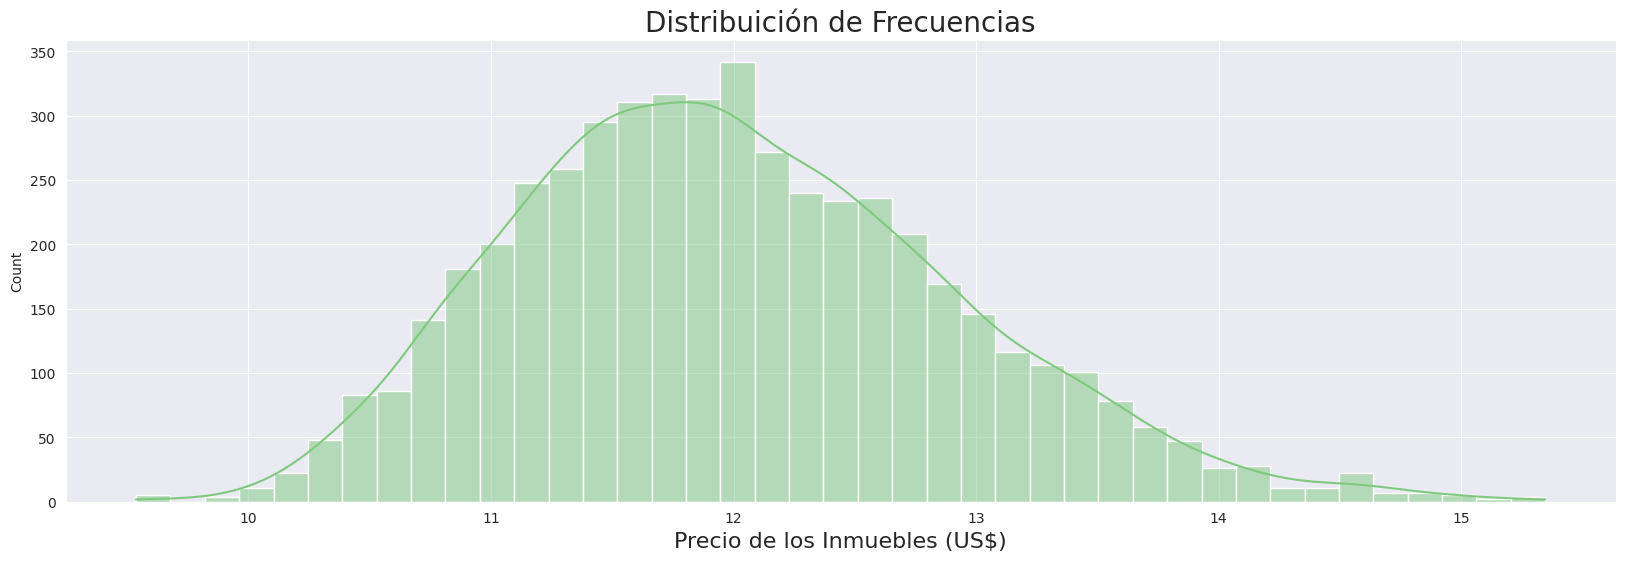

In [ ]:
fig,ax=plt.subplots(figsize=(20, 6))
sns.histplot(datos['log_Valor'],kde=True, ax=ax)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('Precio de los Inmuebles (US$)', fontsize=16)
plt.show()

al analisar la grafica vemos que al hacer la transformaicon logaritmica los valores ahora no presentan asimetria a la derecha, si no preentan siemtria, siendo esto que nos dice que ahora nuestros dato estan cerca o siguen una distribucion normal, necesario que lo dato tengan una distribucion normal para realizar nuestro modelo de regrtesion lineal

# <font color='red' style='font-size: 30px;'>3.2 Comprobando relación lineal</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables transformadas del dataset

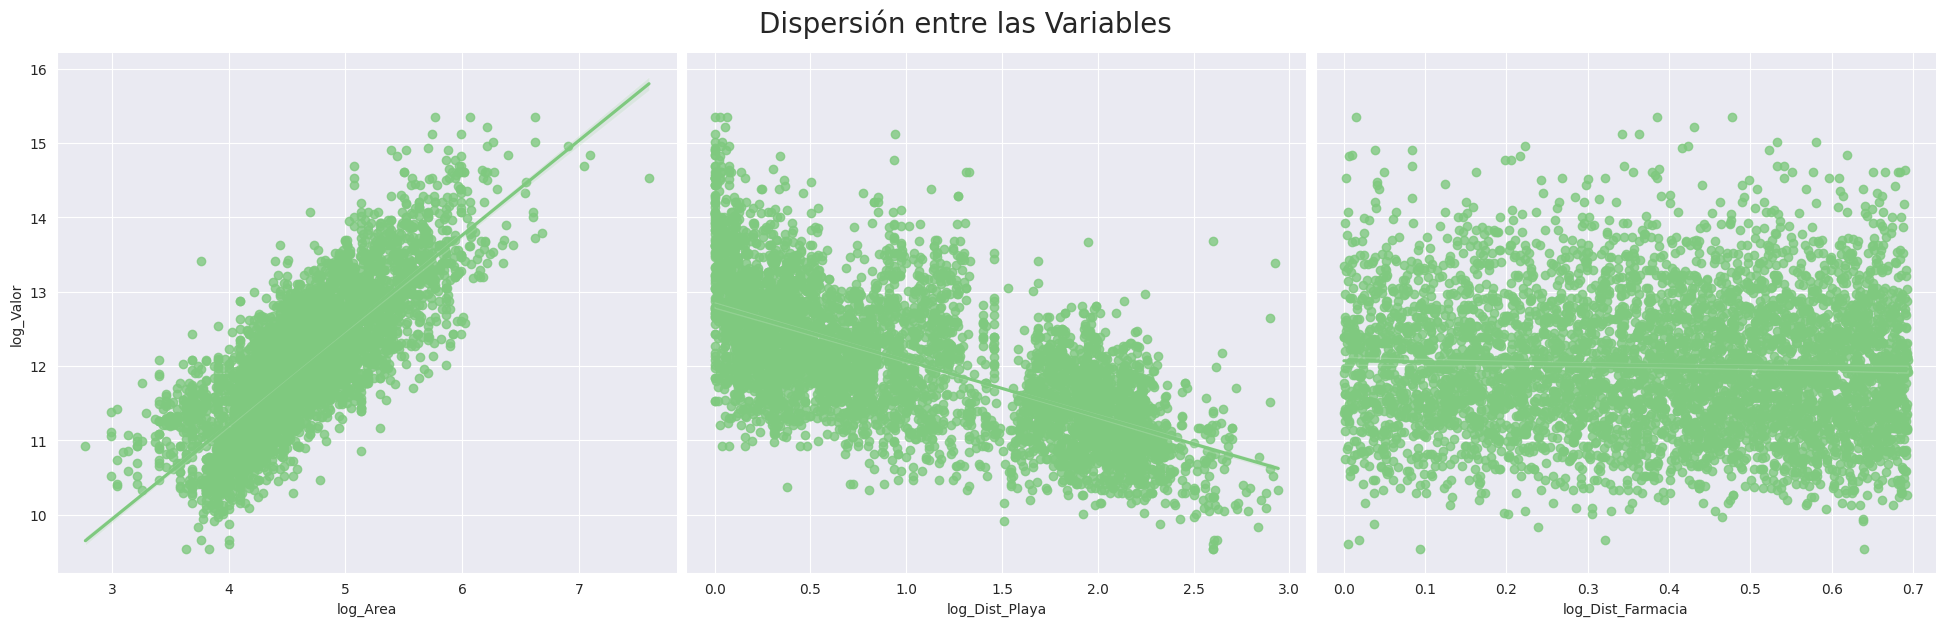

In [ ]:
ax=sns.pairplot(datos,y_vars='log_Valor',x_vars=['log_Area','log_Dist_Playa','log_Dist_Farmacia'],height=5,kind='reg')
ax.figure.set_size_inches(20, 6)
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

al observar las grafica podemos decir del analii que la grafica de la relacion log_valor y log_area, tiene una relacion fuerte y poitiva, teniendo un coeficiente de correlacion mayor a 0, comporbandono que al aumentar el area aumenta el valor, con la grafica de la relacion vemoss que tienen una relacion debil y negativa con algo de dipersion y que su coeficiente de relacion es menor a 0, diciendonos que a medida que aumente el valor de la propiedad la ditancia a la playa era menor, con respecto a la ultima grafica de relacion de log_valor y log_farmacia observamos que lo datos tiene mucha disspersion y que us coeficiente de correlaicon e cercano a 0 o es 0, lo que no indica que estas do variables no tienen un relacion, por lo tanto no nos sirve para nuestro modelo y no debemos tomarla cuenta para el nuestro futuro analisis

# <font color='red' style='font-size: 30px;'>4.1 Creando los *Datasets* de Entrenamiento y Prueba</font>
<hr style='border: 2px solid red;'>

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

ahora debemos dividir al hacer los datos en do moldelos una para entrenar y la otra para evaluar mediante predicciones, siendo esta usada por la funcion train test

In [ ]:
from sklearn.model_selection import train_test_split

## Creando una Series (pandas) para almacenar el Precio de los Inmubles (y)

In [ ]:
#primero nos pide un data frame para la variable independiente
y=datos['log_Valor']

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [ ]:
#segundo paso dataframe para la variables depenientes o explicativass
x=datos[['log_Area','log_Dist_Playa','log_Dist_Farmacia']]

## Creando los datasets de entrenamiento y de prueba

In [ ]:
#escribimo la funcion para crear el modelo test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2811)#para los parametross
#primero agregamo y los datos independiente de nuestro dataframe, luego x dato dependientes y con
#test_size especificamos el tamaño de la muestra que queremos agregar al modelo prueba en terminos porcentualess
#como nuestro ejercicio tenemos 5,000 datos vamo a agregar el 20% de la obervaciones para nuestro conjunto de prube y
#el resto para nuetro conjunto del modelo de estrenamiento, finalmente agregamos una cemilla
#que generara numero aleatorios para que podamo generar los mimos conjunto de entrenamiento y prueba en cada ejecution de codigo y tener los mismos
#resultados a lo largo del curo

el primero de la lista es x_train que es el x del conjunto de entrenamineto este almacenara los valores de las variables explicativa del conjunto de entrenamiento, x_test e el x del conjunto de prueba y almacenara lo valores de la variables explicativa del conjunto de prubra, y=train almacenara los valores del conjunto de entrenamiento los valores independeintes, y_test almacenara lo valores independeintes del conjunto de prueba

au ves cada uno esta relacionado de acuerdo asu variable dependeinte y independeinte del conjunto sieno test o train

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>



<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Log-lineal.png'>

## Importando la biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [ ]:
import statsmodels.api as sm #esta biblioteca nos ayuda a poder realizar la regresion y correr nuestos modelos estadisticos

## Estimando el modelo con statsmodels

In [ ]:
x_train_con_constante=sm.add_constant(x_train)#añadimos el data frame de la variable explicativa x_train
x_train_con_constante.head()

,const,log_Area,log_Dist_Playa,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903


vemos que se agrego una columna al dataframe por lo tanto esta es la forma de crear una cosntante con statmodel la primera columna siempre sera formada con unos.

en algebra matricial en modelo de regresion la tabla representa la matris teorica x, al considerar la cosntante del modelo


con este dataframe podemos usar statsmodel, pero que pasa si no inlcuimos la cosntante, no hay ninguna obligacion para sacarla pero la estimacion del modelo con constante, asegura que los residuos que son la estimacion de Ui tengan un promedio de ceor

por eso uno de lso presupuestos teoricos del modelo de regresion es que los residuos tengan una media de cero, por ende estimar un modelo sin constante no nos asegura que los resiudos sean cero y tendriamos estimaciones sesgadas

In [ ]:
modelo_statsmodels=sm.OLS(y_train,x_train_con_constante,hasconst=True).fit()#nos brindara los datos estrategicos del modelo

recordar para hacer los modelos usamos el metodo de minimos cuadrados ols que nos pide la variable independiente, la varibale dependiente con constante, hascont=True indicando que tnemeos constante, y fit() para implementar en conjunto los datos

# <font color='red' style='font-size: 30px;'>4.2 Evaluando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Evaluando las estadísticas de prueba del modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Mon, 21 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:30:10   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.6534      0.06

R2 mide el grado de ajuste del modelo a los datos. El valor fue de 80%, que es un valor alto. Y aquí abajo tenemos como novedad el R2 ajustado. ¿Ajustado en función de qué?

 Ajustado en función de los grados de libertad, los grados de libertad son intervalos muy simples. La cantidad de información que los datos proporcionan y que puede gastar para estimar los coeficientes del modelo. A medida que agregamos una variable a un modelo, perdemos un grado de libertad y eso entra en el cálculo de este R2 ajustado.

 Entonces, el R2 ajustado es una modificación del R2 normal para penalizar el uso de variables que no son relevantes para explicar la variable dependiente. Recuerden, en el curso anterior que el R2 normal, que arriba siempre va a aumentar, incluso si incluimos variables que no aportan en la calidad de las predicciones de la variable dependiente.

 En el peor de los casos el R2 permanecerá constante. Este R2 aquí arriba, el primero permanecerá constante, pero nunca disminuirá el valor. Por lo tanto este R2 ajustada que abajo es una forma de penalizar modelos con muchas variables explicativas que no ayuda en absoluto a la calidad y predictiva del modelo.

 En suma, si agregas más y más variables inútiles al modelo, el R2 ajustado disminuirá, pues perderemos muchos grados de libertad, y las variables no aportarán información de calidad. Caso contrario, si agregas más variables ahora útiles, el R2 ajustado aumentará.

 En suma, la información generada por las variables explicativas tiene que compensar la pérdida de grados de libertad.

el test F (F-static) prueba la significancia conjunta de la eficiencia del modleo si tiene sentido o no es decri la Ho nos dice que todos los coeficientes del modelo son iguales a cero, el modelo no existe, la H1 es que almenos uno de los coeficientes es diferente a cero, una de las variables explicativas influye en la variable independeinte


en este F-static purbea la significacnia conjunta de los cieficientes de regresion y estos son aquellos que multiplican cada variable explicativa, estos miden el efecto parcial de cada variable explicativa(beta1,beta2,beta3,beta4)

el test prueba la sifinificancia  conjutna de los coeficientes de las variables log area, log playa y log farmacia, diciendo nuestra primera Ho o H1, como verificamos esto, mediante el Pro(F-static) que es el valro de probabilidad del test en este caso es 0,
en este caso como el valor de probabilidad es menor a 0.05 de nuestro alfa del nivel de confianza, por lo tanto
"Si el valor p es mayor que 0.05, aceptamos H₀ y rechazamos el modelo." (Correcto).

"Si el valor p es menor que 0.05, rechazamos H₀ y el modelo es significativo." (Correcto).

 concluimos que el modelo estadistico es significante con un valor p es 0.00 < 0.05, debes rechazar H₀ y concluir que el modelo es estadísticamente significativo al 5% (pasa la prueba F). por lo tanto uno de los coeficientes si es diferente a cero

las estadísticas T. Las estadísticas T, en esta columna, las estadísticas T prueban la importancia individual de cada coeficiente. La hipótesis nula es de que el coeficiente es igual a 0. Y la hipótesis alternativa es de que el coeficiente es diferente de 0.

Entonces aquí tenemos cuatro estadísticas T, o sea para cada coeficiente del modelo. El test T funciona de manera similar a la prueba F, pero prueba cada coeficiente individualmente. Por eso tenemos cuatro. Tenemos estadísticas T para cada coeficiente, tenemos cuatro coeficientes, contando que el tercero entonces vamos a tener cuatro estadísticas T.

Entonces aquí tenemos cuatro estadísticas T, o sea para cada coeficiente del modelo. El test T funciona de manera similar a la prueba F, pero prueba cada coeficiente individualmente. Por eso tenemos cuatro. Tenemos estadísticas T para cada coeficiente, tenemos cuatro coeficientes, contando que el tercero entonces vamos a tener cuatro estadísticas T.

Y podemos decir que el coeficiente estadístico significativo es de menos de 5% de significancia. Bueno, aquí entonces podemos ver que, empezando con el tercero, con la constante, el P valor es igual a 0, es menor que 0.05. Entonces podemos ver que el intercepto es estadísticamente significativo.

 Pero cabe mencionar que, incluso si la constante no es significativa, si su P valor es mayor que 0.05, siempre debemos incluir intercepto el modelo, porque su ausencia puede generar los problemas que yo dije antes. Por lo tanto, para la estadística T, la prueba T solo lo que nos interesa aquí es solo la estadística T. Lo que solo nos interesa aquí son la significancia de los coeficientes de regresión: β2, β3 y β4

El intercepto no importa si es significativo o no, pues siempre debemos incluirlo en nuestro modelo. Entonces lo que interesa aquí es solo la significancia estadística de los coeficientes de regresión de cada variable explicativa. Podemos ver aquí entonces que el P valor de la estadística T del coeficiente de log_Area es menor que 0.05


Entonces podemos concluir que el coeficiente de log_Area estadísticas significativas al nivel de 5%. Entonces lo mismo pasa con log_Dist_Playa, pues su P valor es menor que 0.05 también. Entonces tenemos evidencias estadísticas para creer que esas dos variables log_Area y log_Dist_Playa influyen en las variables dependientes.

Sin embargo, podemos ver que el P valor de log_Dist_Playa es mayor que 0.05, o sea, esta variable no es, su coeficiente no es estadísticamente significativo, y por lo tanto no tenemos evidencia estadística de que esta variable log_Dist_Farmacia ayuda a explicar la variación media de la variable dependiente.

Entonces la única variable que no pasa a la prueba T es log_Dist_Farmacia, por lo que ya podemos pensar en eliminarla de nuestro modelo, ya que ella no sirve para explicar la variación media del precio del inmueble. Además, las variables explicativas tienen un costo a la hora de recopilar sus valores en la vida real.


# <font color='red' style='font-size: 30px;'>4.3 Modificando el modelo y reevaluando el ajuste</font>
<hr style='border: 2px solid red;'>

## Creando un nuevo conjunto de variables explicativas (X)

In [ ]:
x=datos[['log_Area','log_Dist_Playa']]

## Creando los datasets de entrenamiento y de prueba

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2811)

## Estimando el modelo con el statsmodels

In [ ]:
x_train_con_constante=sm.add_constant(x_train)

In [ ]:
modelo_statsmodels=sm.OLS(y_train,x_train_con_constante,hasconst=True).fit()

## Evaluando las estadísticas de prueba para el nuevo modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Mon, 21 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:30:10   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.6467      0.059    129.

con esto podemos ver nuestras variabless influyen en nuestra variable independiente con el 0.05 % de significancia

## lo que aprendimos

* Como preparar los datos y crear los datasets de entrenamiento y prueba.
* Como estimar el modelo de regresión lineal.
* Como analizar las estadísticas de prueba del modelo.
* Como modificar el modelo y ver el ajuste.

# <font color='red' style='font-size: 30px;'>5.1 Estimando el Modelo con los Datos de Entrenamiento</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* y *metrics* da la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics #para evaluar predicciones

## Instanciando la clase *LinearRegression()*

In [ ]:
modelo=LinearRegression()

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
modelo.fit(x_train,y_train)

LinearRegression()

aqui tenemoss nuestro modelo estimado uando la biblioteca skerlean, cabe mencionar skaler lean no calcula todo como vimo en la tabla de statmodel, la funcion solo etima lo coeficientes del modelo y hace predicciones

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.


$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
print(f'R^2={modelo.score(x_train,y_train):.3f}')

R^2=0.805


## Generando predicciones para los datos de PRUEBA (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

vamo a calcular las predicciones de dato del modelo, dado que queremos ver que i la prediccione que genera el modelo estan cerca de lo valores reales de los inmuebles

In [ ]:
y_pred = modelo.predict(x_test)

se usasn losss datos sumados de la variable dependeinte para hacer predicciones de la varibale dependeinte en funcion del x_test, osea los valores de prueba de las variables explicativa del conjunto de prueba hace la funcoin predic

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
print(f'R^2={metrics.r2_score(y_test, y_pred):.3f}')

R^2=0.790


usamo la funcion metric y especificamos r2 el conteo y comparamo los valores de y_test con y_pred.

obtenemoss el r2 de loss datos de prueba el cual es muy proximo al r2 de nuestro modelo, lo que e una señal buena dado que no e mucha diferencia del r2 que mide el modelo y el r2 del pronotico del modelo

ahora con rl r2 de 0.79 podemos decri que el modelo es capas de predecir el precio real de lo inmuebles

# <font color='red' style='font-size: 30px;'>5.2 Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

In [ ]:
entrada=x_test[0:1]
entrada

,log_Area,log_Dist_Playa
1006,5.273,1.282769


## Generando predicción puntual

In [ ]:
#podemos computar la prediccion de ete inmueble utilizando lo coeficientes etimados del modelo
print(f'{modelo.predict(entrada)[0]:.3f}')


12.597


la funcion genera un pronotico de 12.59 esto significa dolares, recordando que usamo log peliano cuya bae es e para tener el valor predicto en dolare, para mover la ecala original de la variable tenemos que invertir la transsformacion logaritmica aplicando la funcion exponencial.

## Invirtiendo la transformación para obtener la estimación en US$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [ ]:
print(f'{np.exp(modelo.predict(entrada)[0]):.3f}')

295543.351


aqui tenemos la prediccion en dolares, donde antes habiamos sacado la prediccion normal, pero ahora tenemos la prediccion en dolares despues de aplicar la transformacion exponencial de 295543.351

lo que nos dice que el inmueble de acuerdo con esas caracteristicas tenga un precio estimado de 295543.351 dolares

## Creando un simulador simple

In [ ]:
#creando un simulador para determinar el precio de una casa con los sigueintes atributos:
area=150
dis_playa=1
#tenemos que pasar los valores a la escala logaritmica
entrada=[[np.log(area),np.log(dis_playa+1)]]
print('Us${}'.format(np.exp(modelo.predict(entrada)[0]).round(2)))

Us$299013.68


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


con esto tenemos un simulador que no brinda el precio aproximado de 299013.68 dolares de una casa con las caracteriticas dichas anteriormente

# <font color='red' style='font-size: 30px;'>5.3 Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

### Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Precio del Inmueble) con todas las variables explicativas excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe ser transformado utilizando la función exponencial para que sea presentado en US$.</p>

In [52]:
modelo.intercept_

np.float64(7.646667897902708)

In [53]:
np.exp(modelo.intercept_)

np.float64(2093.657672537765)

nos da 2093.65 dolares

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2$ y $\beta_3 $ son conocidos como <b> coeficientes de regresión parciales </b> o <b> coeficientes angulares parciales </b>  </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Un aspecto interesante del modelo log-lineal, que lo ha hecho ampliamente utilizado en estudios aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y en relación a $X_2$ y $X_3$, es decir, la variación porcentual de Y correspondiente a una variación porcentual dada (pequeña ) en $X_2$ y $X_3$.</p>

In [56]:
modelo.coef_ #estos son los valores de B2 y B3

array([ 1.05807806, -0.49061238])

## Confirmando el orden de las variables explicativas en el DataFrame

In [59]:
#confirmando los nombres de nuestrass variables
x.columns

Index(['log_Area', 'log_Dist_Playa'], dtype='object')

## Creando una lista de nombres de las variables del modelo

In [60]:
index=['intercepto','log Area','log Ditancia a la Playa']

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [61]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index=index,columns=['Parametros'])

,Parametros
intercepto,7.646668
log Area,1.058078
log Ditancia a la Playa,-0.490612


## Interpretación de los Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> →  Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles seria <b>US$ 2.093,66</b> (exp[7.646667]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Manteniendo constante el valor de $X_3$ (Distancia a la Playa), la adición de 1% en el Área de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distancia a la playa (km)</b> → Manteniendo constante el valor de $X_2$ (Área), la adición de 1% en la Distancia de un inmueble a la playa genera, en promedio, una disminución de <b>0.49%</b> en el Precio del Inmueble.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análisis Gráfico de los Resultados del Modelo</font>
<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [ ]:

ax.figure.set_size_inches(12, 6)
ax.set_title('Predicción X Real', fontsize=18)
ax.set_xlabel('log del Precio - Predicción', fontsize=14)
ax.set_ylabel('log del Precio - Real', fontsize=14)
ax

## Obteniendo los residuos

## Graficando la distribuición de frecuencias de los residuos

In [ ]:

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('log del Precio', fontsize=14)
ax